### Decision tree using sklearn libraries and viewing the tree using graphviz

### Importing the required libraries

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 

### Downloading the dataset

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal_l','sepal_w','petal_l','petal_w','class']
iris_df = pd.read_csv(data_url, names = names)
iris_df.head(100)
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Cleaning and processing the dataset

In [4]:
classes = {
    'Iris-setosa': 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
    }
iris_df = iris_df.replace({'class': classes})
iris_df.head(100)

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [5]:
X = iris_df.iloc[:,:4]
Y = iris_df.iloc[:,4]
X = np.array (X)
Y = np.array (Y)

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
iris_df.shape

(150, 5)

### Declaring a funciton to print the visualization of the decision tree.

In [9]:
def treegraph(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png(), width=300, height=10)

### Making a variety of decision trees models and displaying the tree graph respectively

- Tree using entropy and max depth as 4

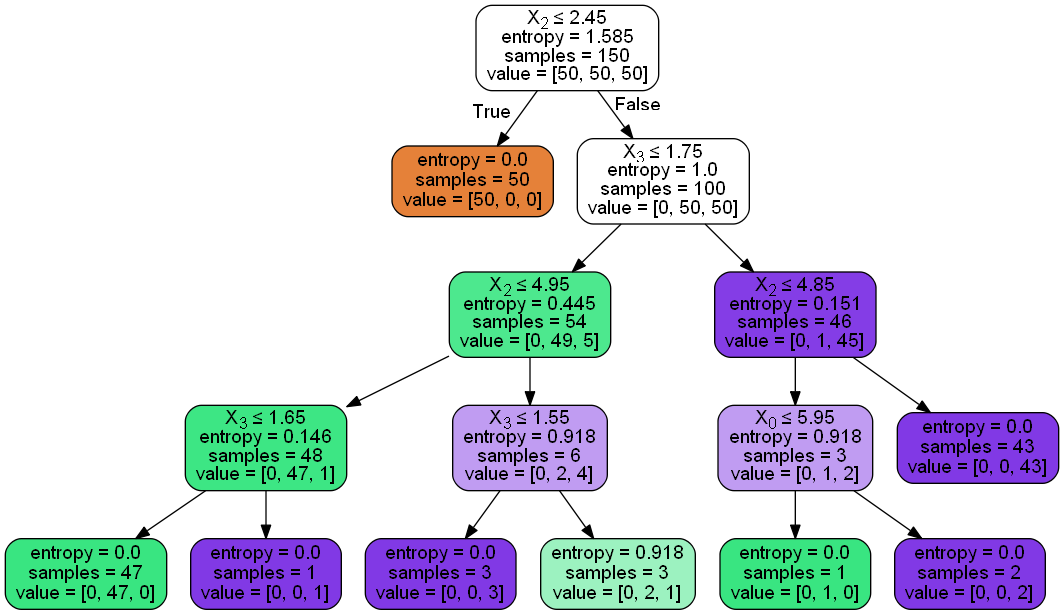

In [10]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
tree.fit(X, Y)
treegraph(tree)

- Tree using entropy and min sample leaf as 50

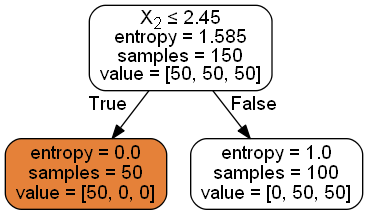

In [11]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 50)
tree.fit(X, Y)
treegraph(tree)

- Tree using entropy and min samples split as 10

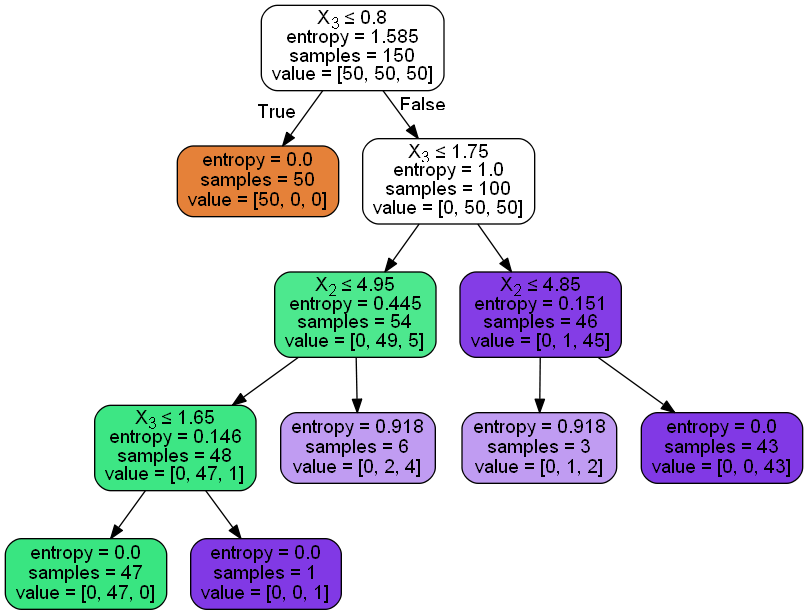

In [12]:
tree = DecisionTreeClassifier(criterion='entropy',min_samples_split = 10)
tree.fit(X, Y)
treegraph(tree)

- Tree using gini index

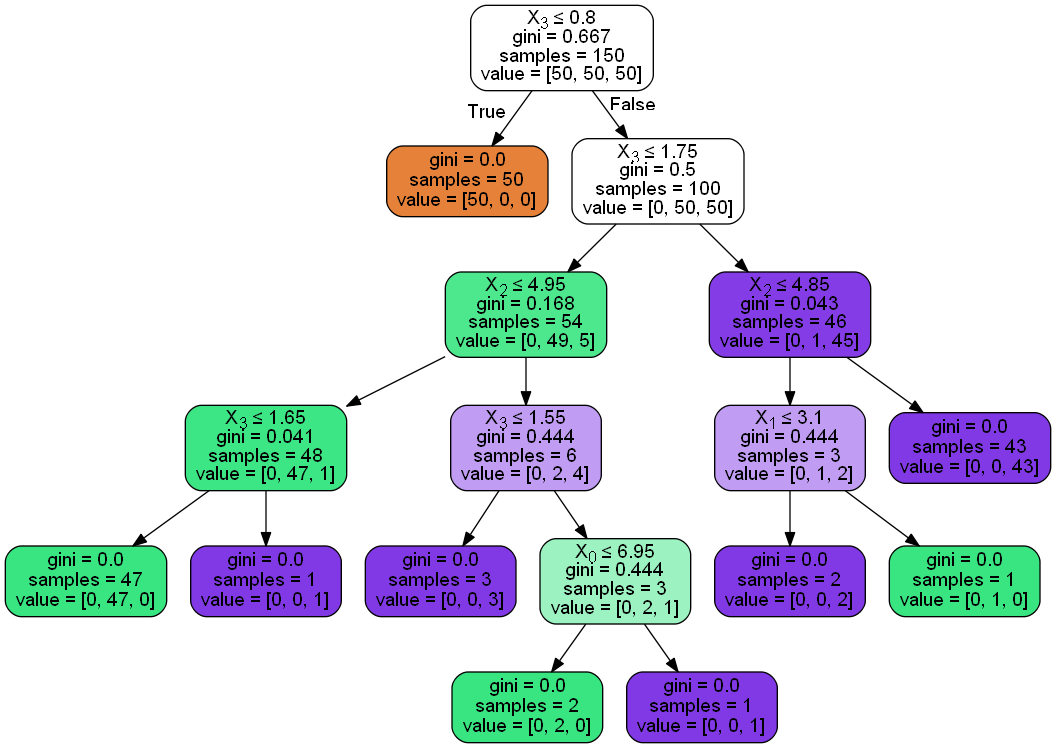

In [13]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X, Y)
treegraph(tree)

- Tree using entropy criterion

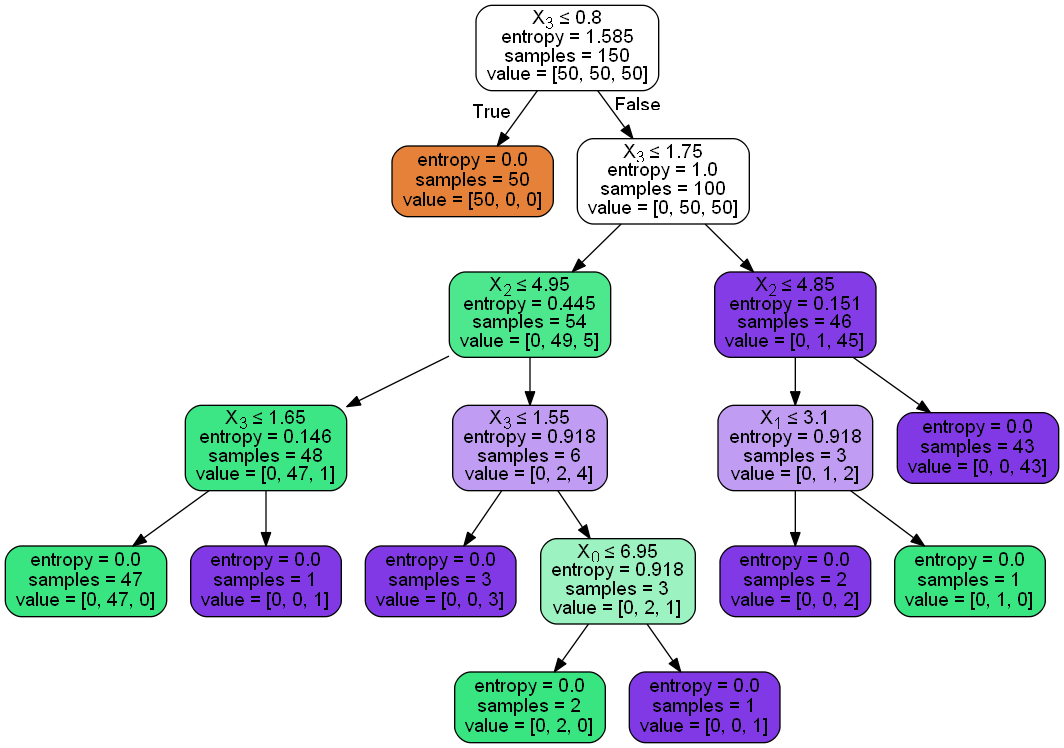

In [14]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X, Y)
treegraph(tree)

### Predict using the tree made of the entropy criterion alone

In [15]:
predict = tree.predict(X)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Determining the accuracy

In [16]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y, predict))

Accuracy: 1.0


### Making a naive bayes classifier model and fitting it to the iris dataset

In [17]:
naive = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
naive.fit(X_train,Y_train)

GaussianNB()

### Predict using naive bayes classifier

In [18]:
naivepredict=naive.predict(X_test)
naivepredict

array([0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 0, 0, 1], dtype=int64)

### Accuracy for naive bayes classifier

In [19]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y_test, naivepredict))

Accuracy: 0.98
